In [20]:
import os
import warnings

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import rcParams
from matplotlib.ticker import FormatStrFormatter
from tqdm import tqdm

In [21]:

# 预设值
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

warnings.simplefilter('ignore')
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None  # 展示所有列
config = {
    "font.family": 'serif',
    "font.size": 20,
    "mathtext.fontset": 'stix',
    "font.serif": ['Times New Roman'],
    "font.weight": "normal"
}
rcParams.update(config)
chinese_font = {
    'family': 'SimSun',
    'size': 20,
    'weight': 'normal',
}

## 华为私有云数据集

100%|██████████| 2/2 [00:00<00:00, 64.47it/s]


id: 72
id: 150


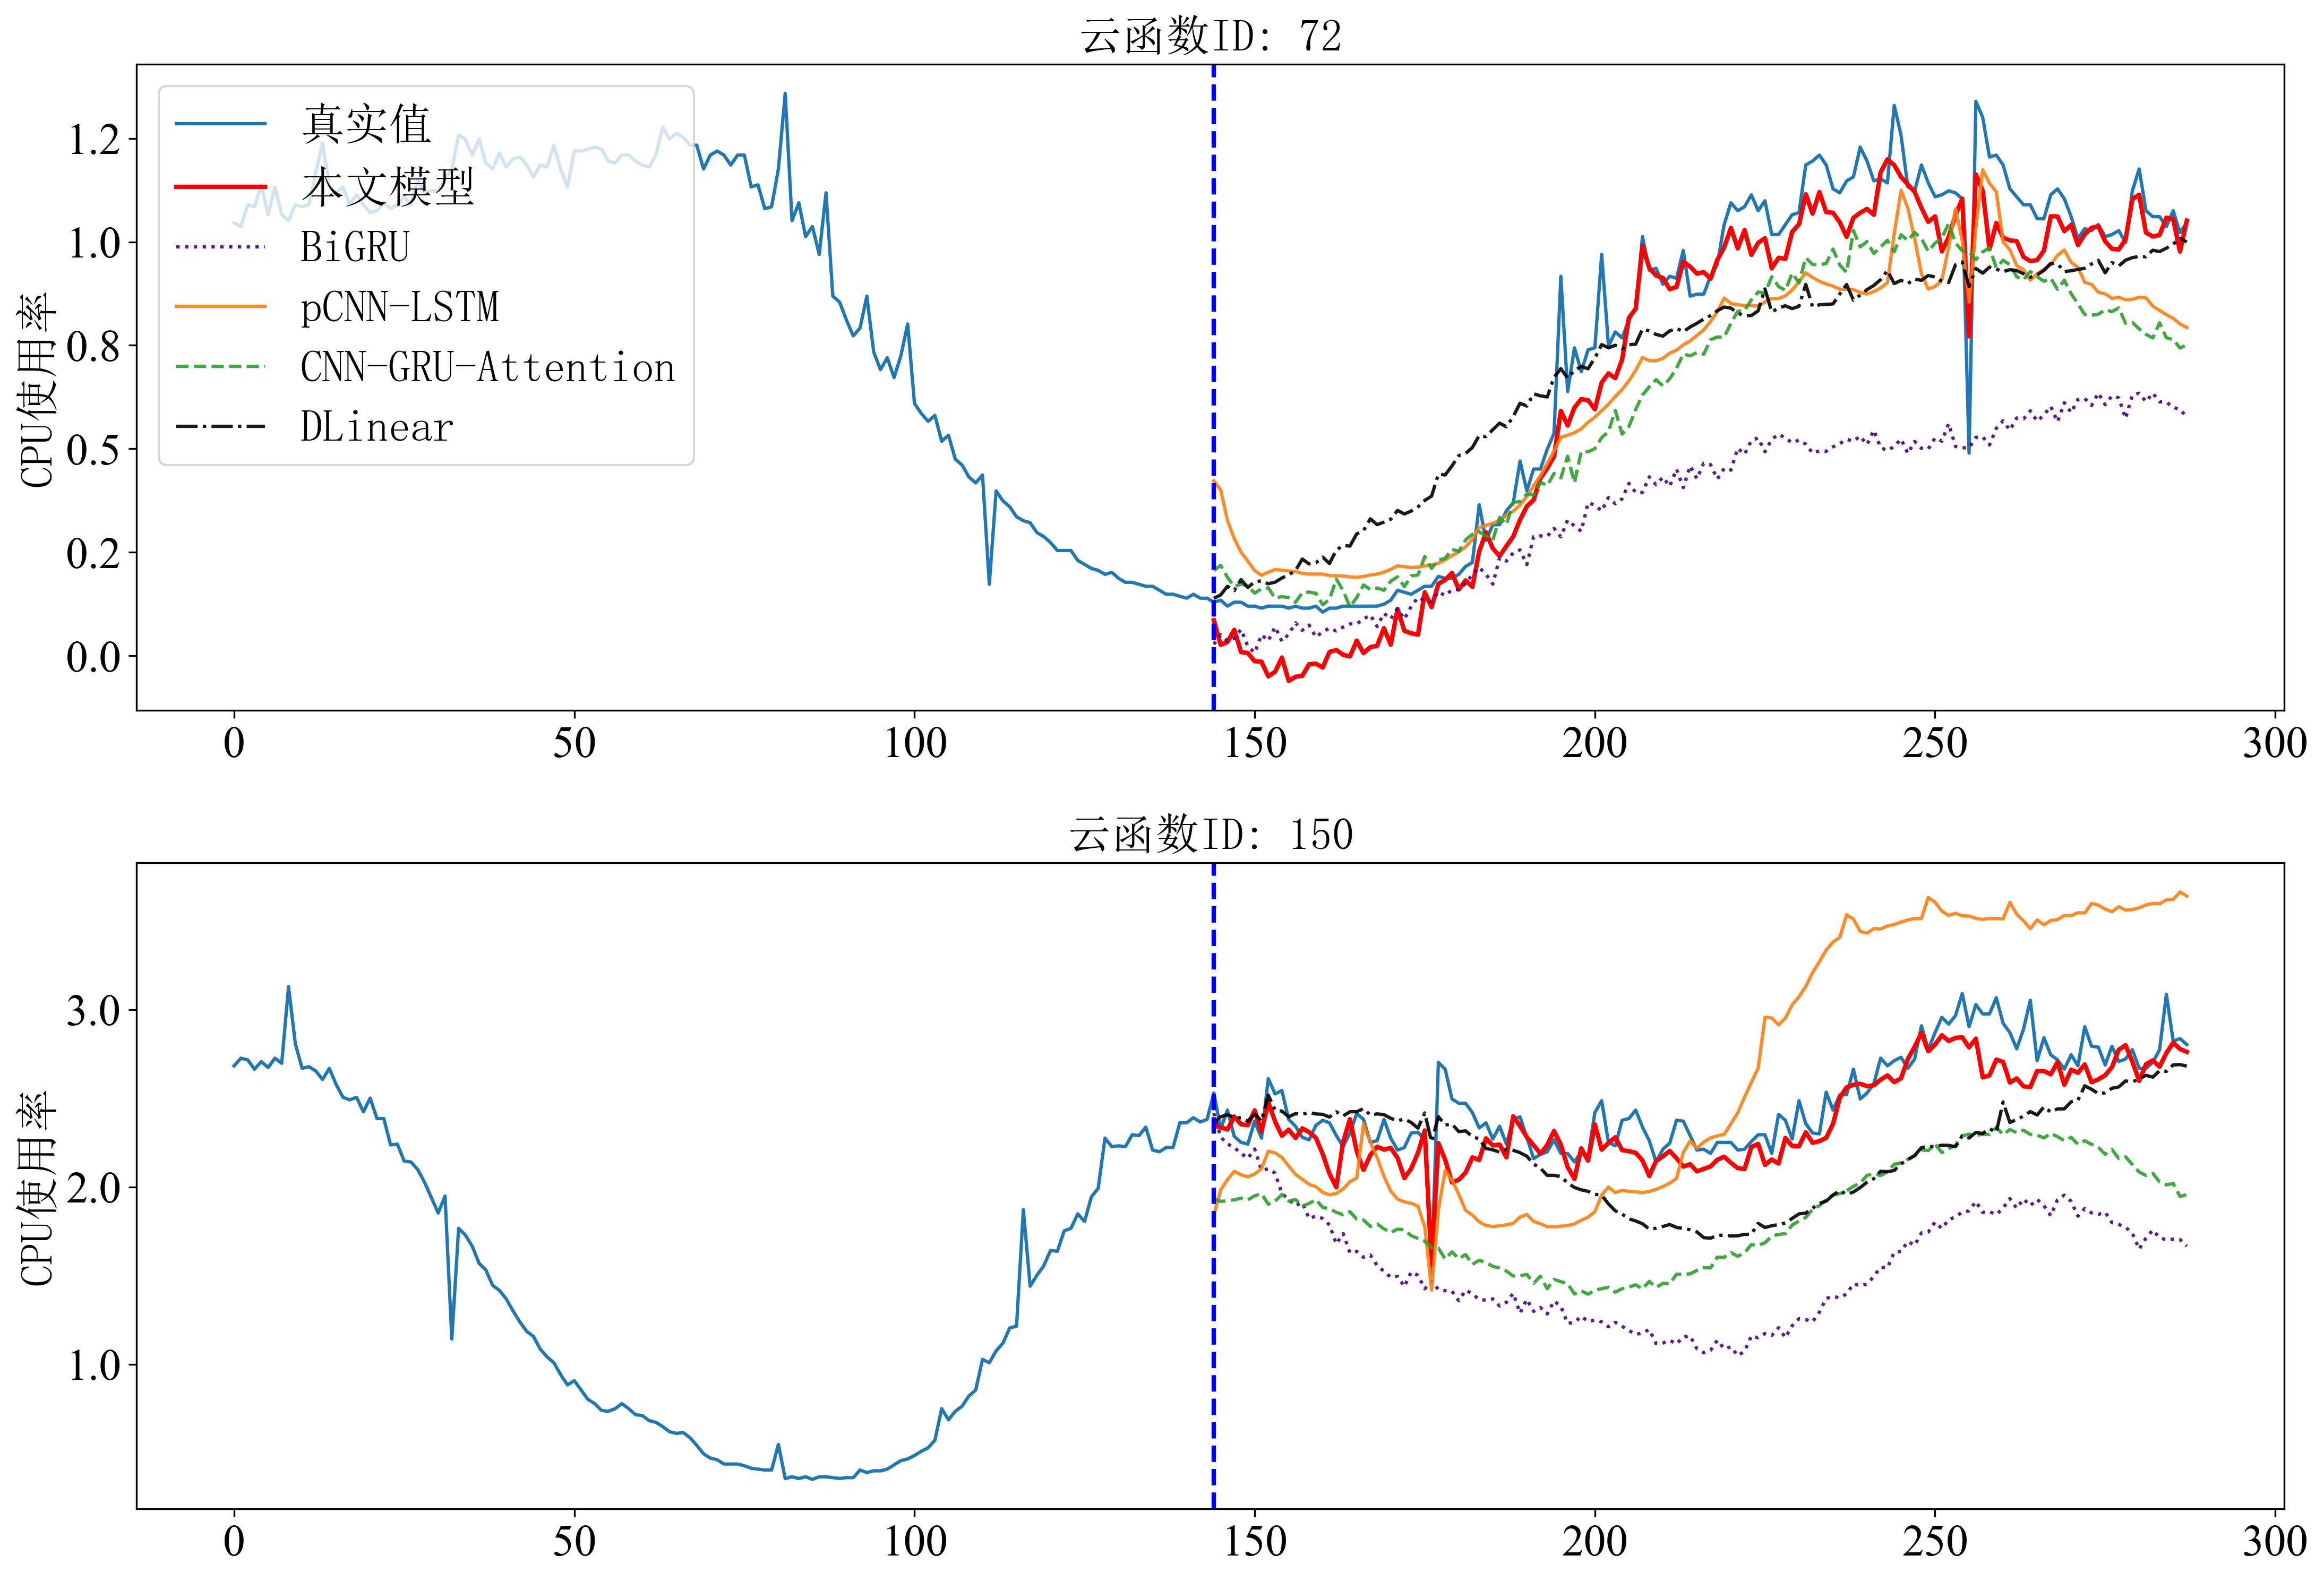

In [19]:
# target = [28, 72, 150]
target = [72, 150]
pred_len = 144

plt.figure(dpi=300, figsize=(15, 20))
idx = 1
for func_id in tqdm(target):
    print('id: {}'.format(func_id))
    dsformer_true = np.load(
        './predict_results/huawei/dsformer/{}_true.npy'.format(func_id))

    dsformer_pred = np.load(
        './predict_results/huawei/dsformer/{}_pred.npy'.format(func_id))
    dLinear_pred = np.load(
        './predict_results/huawei/DLinear/{}_pred.npy'.format(func_id))
    cnn_gru_att_pred = np.load(
        './predict_results/huawei/cnn_lstm_att/{}_pred.npy'.format(func_id))
    bi_gru_pred = np.load(
        './predict_results/huawei/lstm/{}_pred.npy'.format(func_id))
    pcnn_lstm_pred = np.load(
        './predict_results/huawei/pcnn_lstm/{}_pred.npy'.format(func_id))

    # 绘图
    ax = plt.subplot(4, 1, idx)
    ax.plot(range(len(dsformer_true)), dsformer_true, linewidth=1.5,
            label='真实值')
    ax.plot(range(len(dsformer_true) - pred_len, len(dsformer_true)), dsformer_pred, linewidth=2, c='r',
            label='本文模型')
    ax.plot(range(len(dsformer_true) - pred_len, len(dsformer_true)), bi_gru_pred, alpha=0.9, ls=':', c='indigo',
            label='BiGRU')
    ax.plot(range(len(dsformer_true) - pred_len, len(dsformer_true)), pcnn_lstm_pred, alpha=0.9,
            label='pCNN-LSTM')
    ax.plot(range(len(dsformer_true) - pred_len, len(dsformer_true)), cnn_gru_att_pred, alpha=0.9, ls='--',
            label='CNN-GRU-Attention')
    ax.plot(range(len(dsformer_true) - pred_len, len(dsformer_true)), dLinear_pred, alpha=0.9, c='k', ls='-.',
            label='DLinear')

    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    # 添加图例
    if idx == 1:
        ax.legend(prop=chinese_font, loc='upper left')

    # plt.xlabel('Time Point')
    ax.set_ylabel('CPU使用率', chinese_font)
    # 在特定索引位置画一条直线
    ax.axvline(len(dsformer_true) - pred_len, color='blue', linestyle='--', linewidth=2)
    ax.set_title('云函数ID: {}'.format(func_id), chinese_font)

    idx += 1

plt.tight_layout()
plt.savefig('./predict_results/huawei/' + '{}_forcast_paper.svg'.format('cpu'), format='svg', dpi=1000,
            bbox_inches='tight')
plt.show()


# 读取.npy文件


100%|██████████| 2/2 [00:00<00:00, 56.29it/s]


id: 72
id: 150


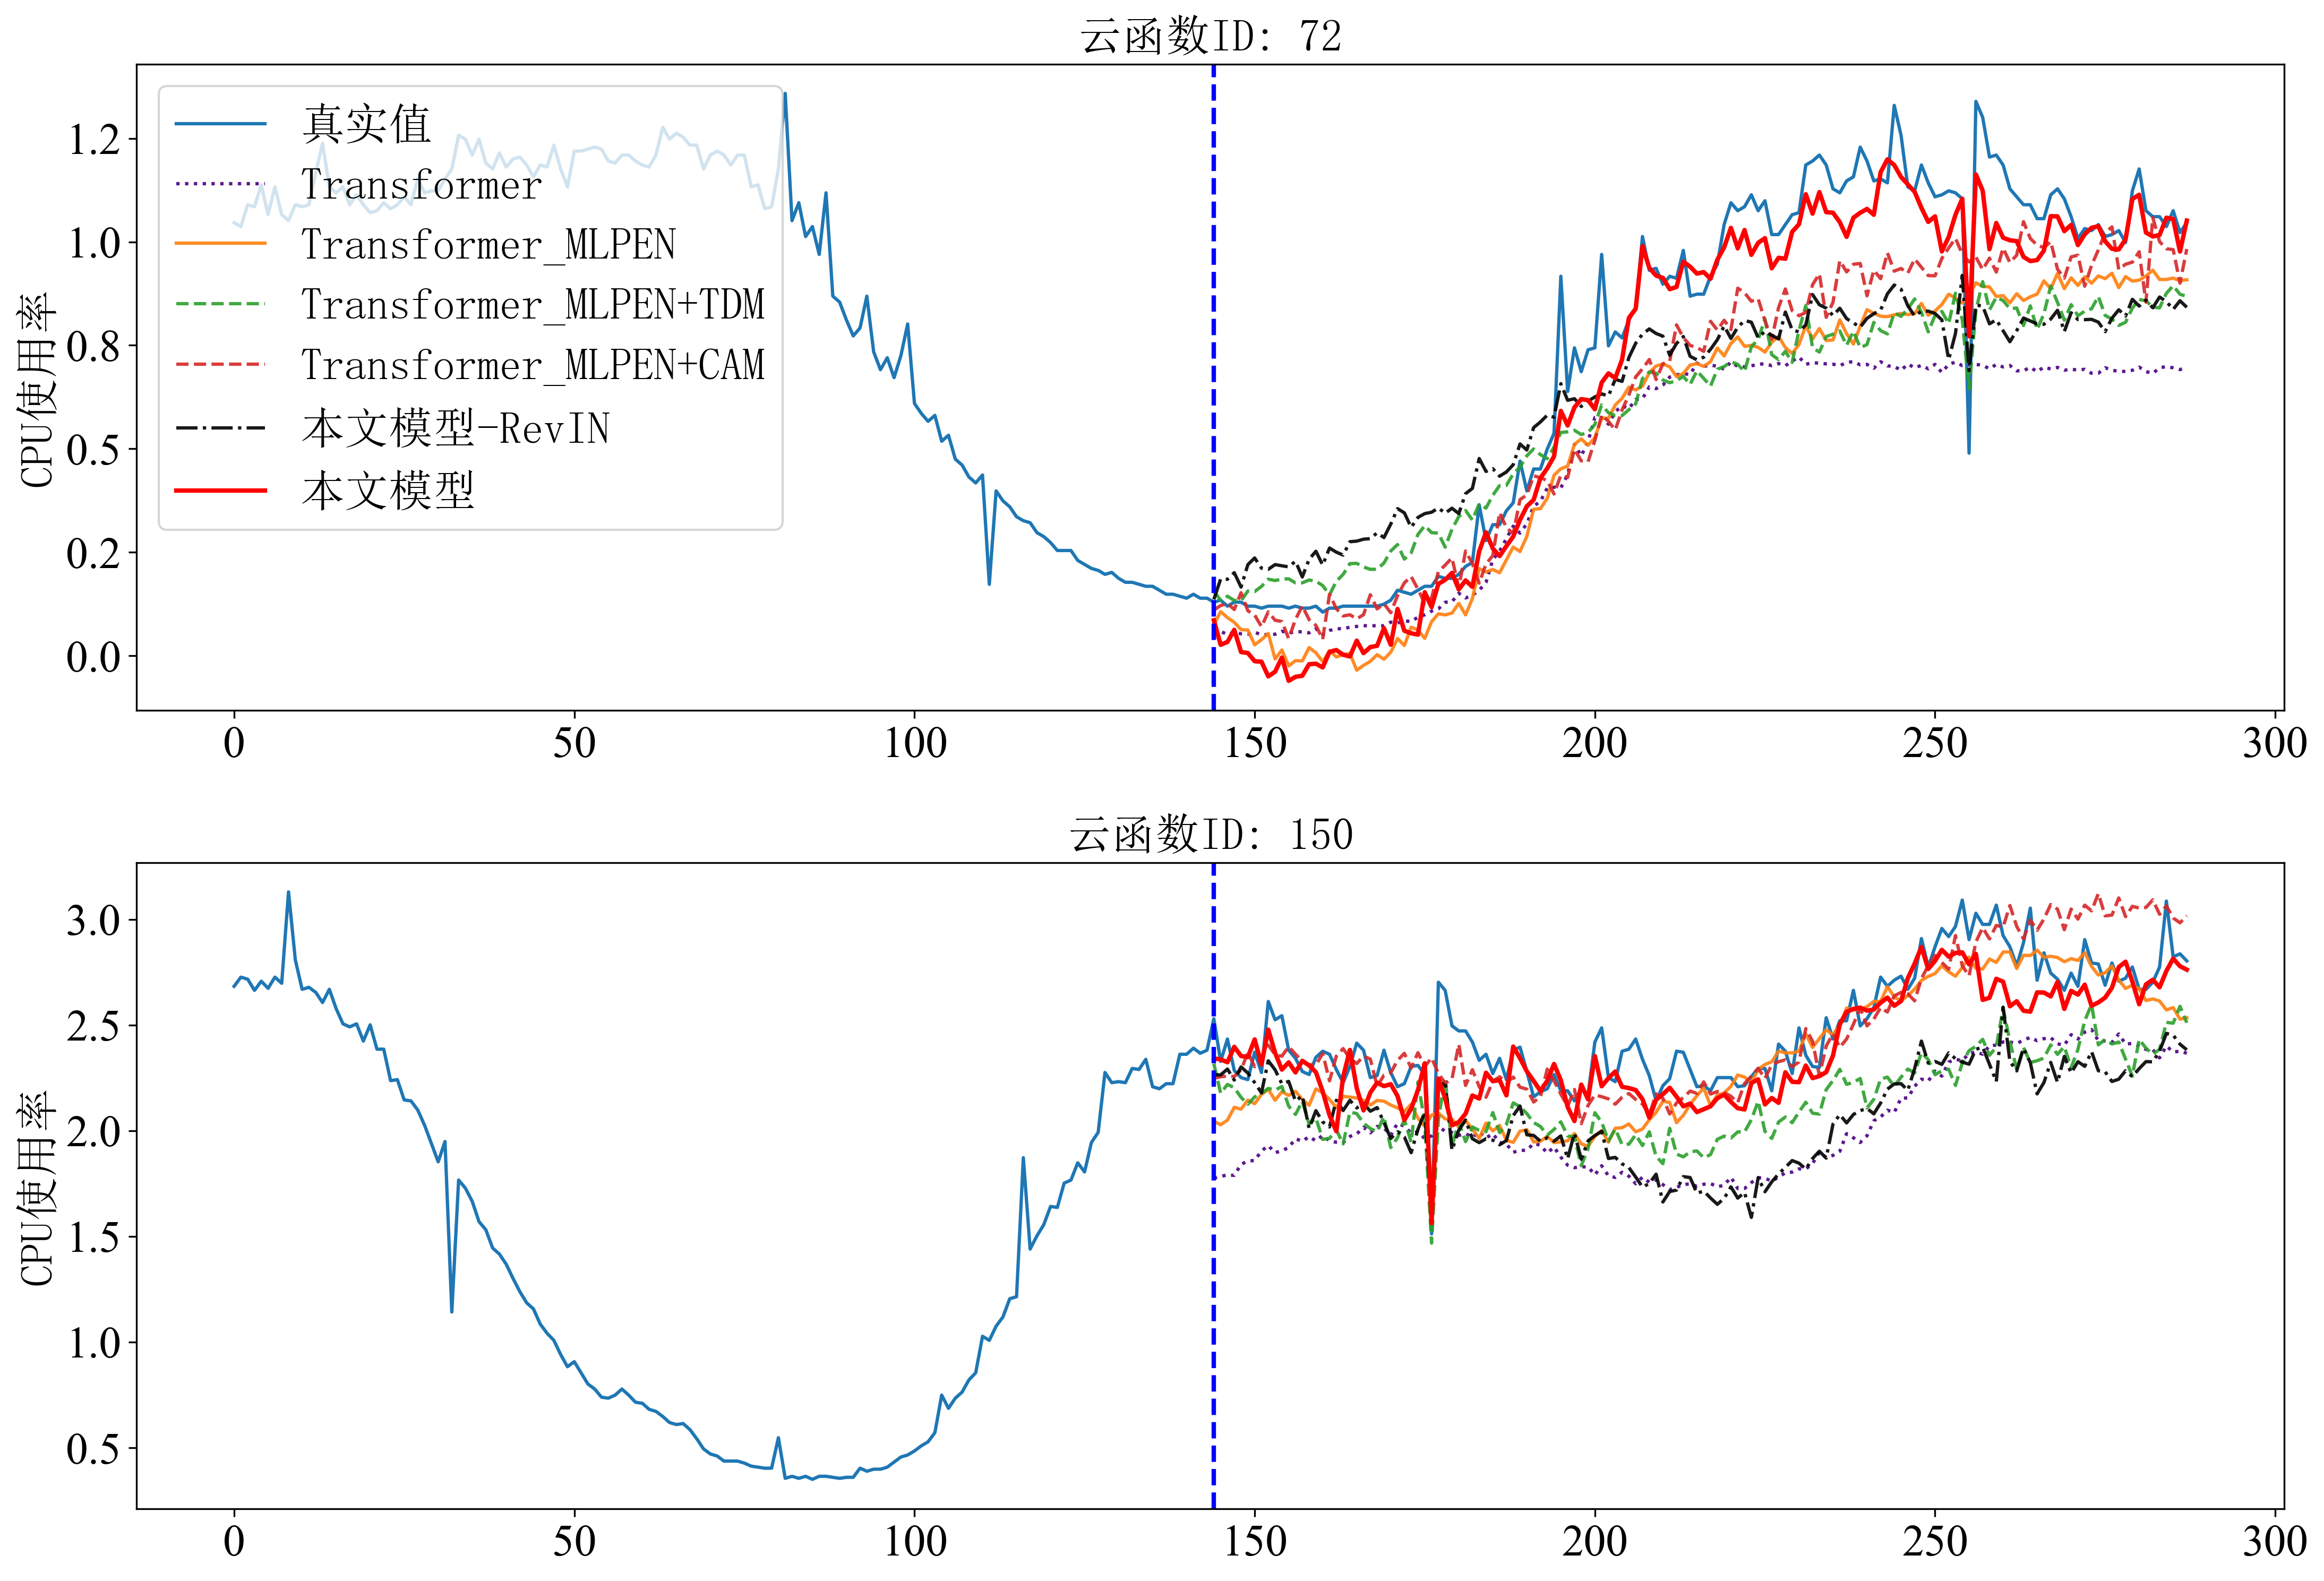

In [18]:
# 消融实验
# target = [28, 72, 150]
target = [72, 150]
pred_len = 144

plt.figure(dpi=300, figsize=(15, 20))
idx = 1
for func_id in tqdm(target):
    print('id: {}'.format(func_id))
    dsformer_true = np.load(
        './predict_results/huawei/dsformer/{}_true.npy'.format(func_id))

    dsformer_pred = np.load(
        './predict_results/huawei/dsformer/{}_pred.npy'.format(func_id))
    transformer_pred = np.load(
        './predict_results/huawei/transformer/{}_pred.npy'.format(func_id))
    dsformer_revin = np.load(
        './predict_results/huawei/dsformer_revin/{}_pred.npy'.format(func_id))
    dsformer_trend = np.load(
        './predict_results/huawei/dsformer_trend/{}_pred.npy'.format(func_id))
    transformer_mlp = np.load(
        './predict_results/huawei/transformer_mlp/{}_pred.npy'.format(func_id))
    dsformer_cam = np.load(
        './predict_results/huawei/dsformer_cam/{}_pred.npy'.format(func_id))

    # 绘图
    ax = plt.subplot(4, 1, idx)
    ax.plot(range(len(dsformer_true)), dsformer_true, linewidth=1.5,
            label='真实值')
    ax.plot(range(len(dsformer_true) - pred_len, len(dsformer_true)), transformer_pred, alpha=0.9, ls=':', c='indigo',
            label='Transformer')
    ax.plot(range(len(dsformer_true) - pred_len, len(dsformer_true)), dsformer_cam, alpha=0.9,
            label='Transformer_MLPEN')
    ax.plot(range(len(dsformer_true) - pred_len, len(dsformer_true)), dsformer_trend, alpha=0.9, ls='--',
            label='Transformer_MLPEN+TDM')
    ax.plot(range(len(dsformer_true) - pred_len, len(dsformer_true)), transformer_mlp, alpha=0.9, ls='--',
            label='Transformer_MLPEN+CAM')
    ax.plot(range(len(dsformer_true) - pred_len, len(dsformer_true)), dsformer_revin, alpha=0.9, c='k', ls='-.',
            label='本文模型-RevIN')
    ax.plot(range(len(dsformer_true) - pred_len, len(dsformer_true)), dsformer_pred, linewidth=2, c='r',
            label='本文模型')

    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    # 添加图例
    if idx == 1:
        ax.legend(prop=chinese_font, loc='upper left')

    # plt.xlabel('Time Point')
    ax.set_ylabel('CPU使用率', chinese_font)
    # 在特定索引位置画一条直线
    ax.axvline(len(dsformer_true) - pred_len, color='blue', linestyle='--', linewidth=2)
    ax.set_title('云函数ID: {}'.format(func_id), chinese_font)

    idx += 1

plt.tight_layout()
plt.savefig('./predict_results/huawei/' + '{}_ablation_paper.svg'.format('cpu'), format='svg', dpi=1000,
            bbox_inches='tight')
plt.show()

## 公司数据集

100%|██████████| 2/2 [00:00<00:00, 20.50it/s]

id: 5
id: 36


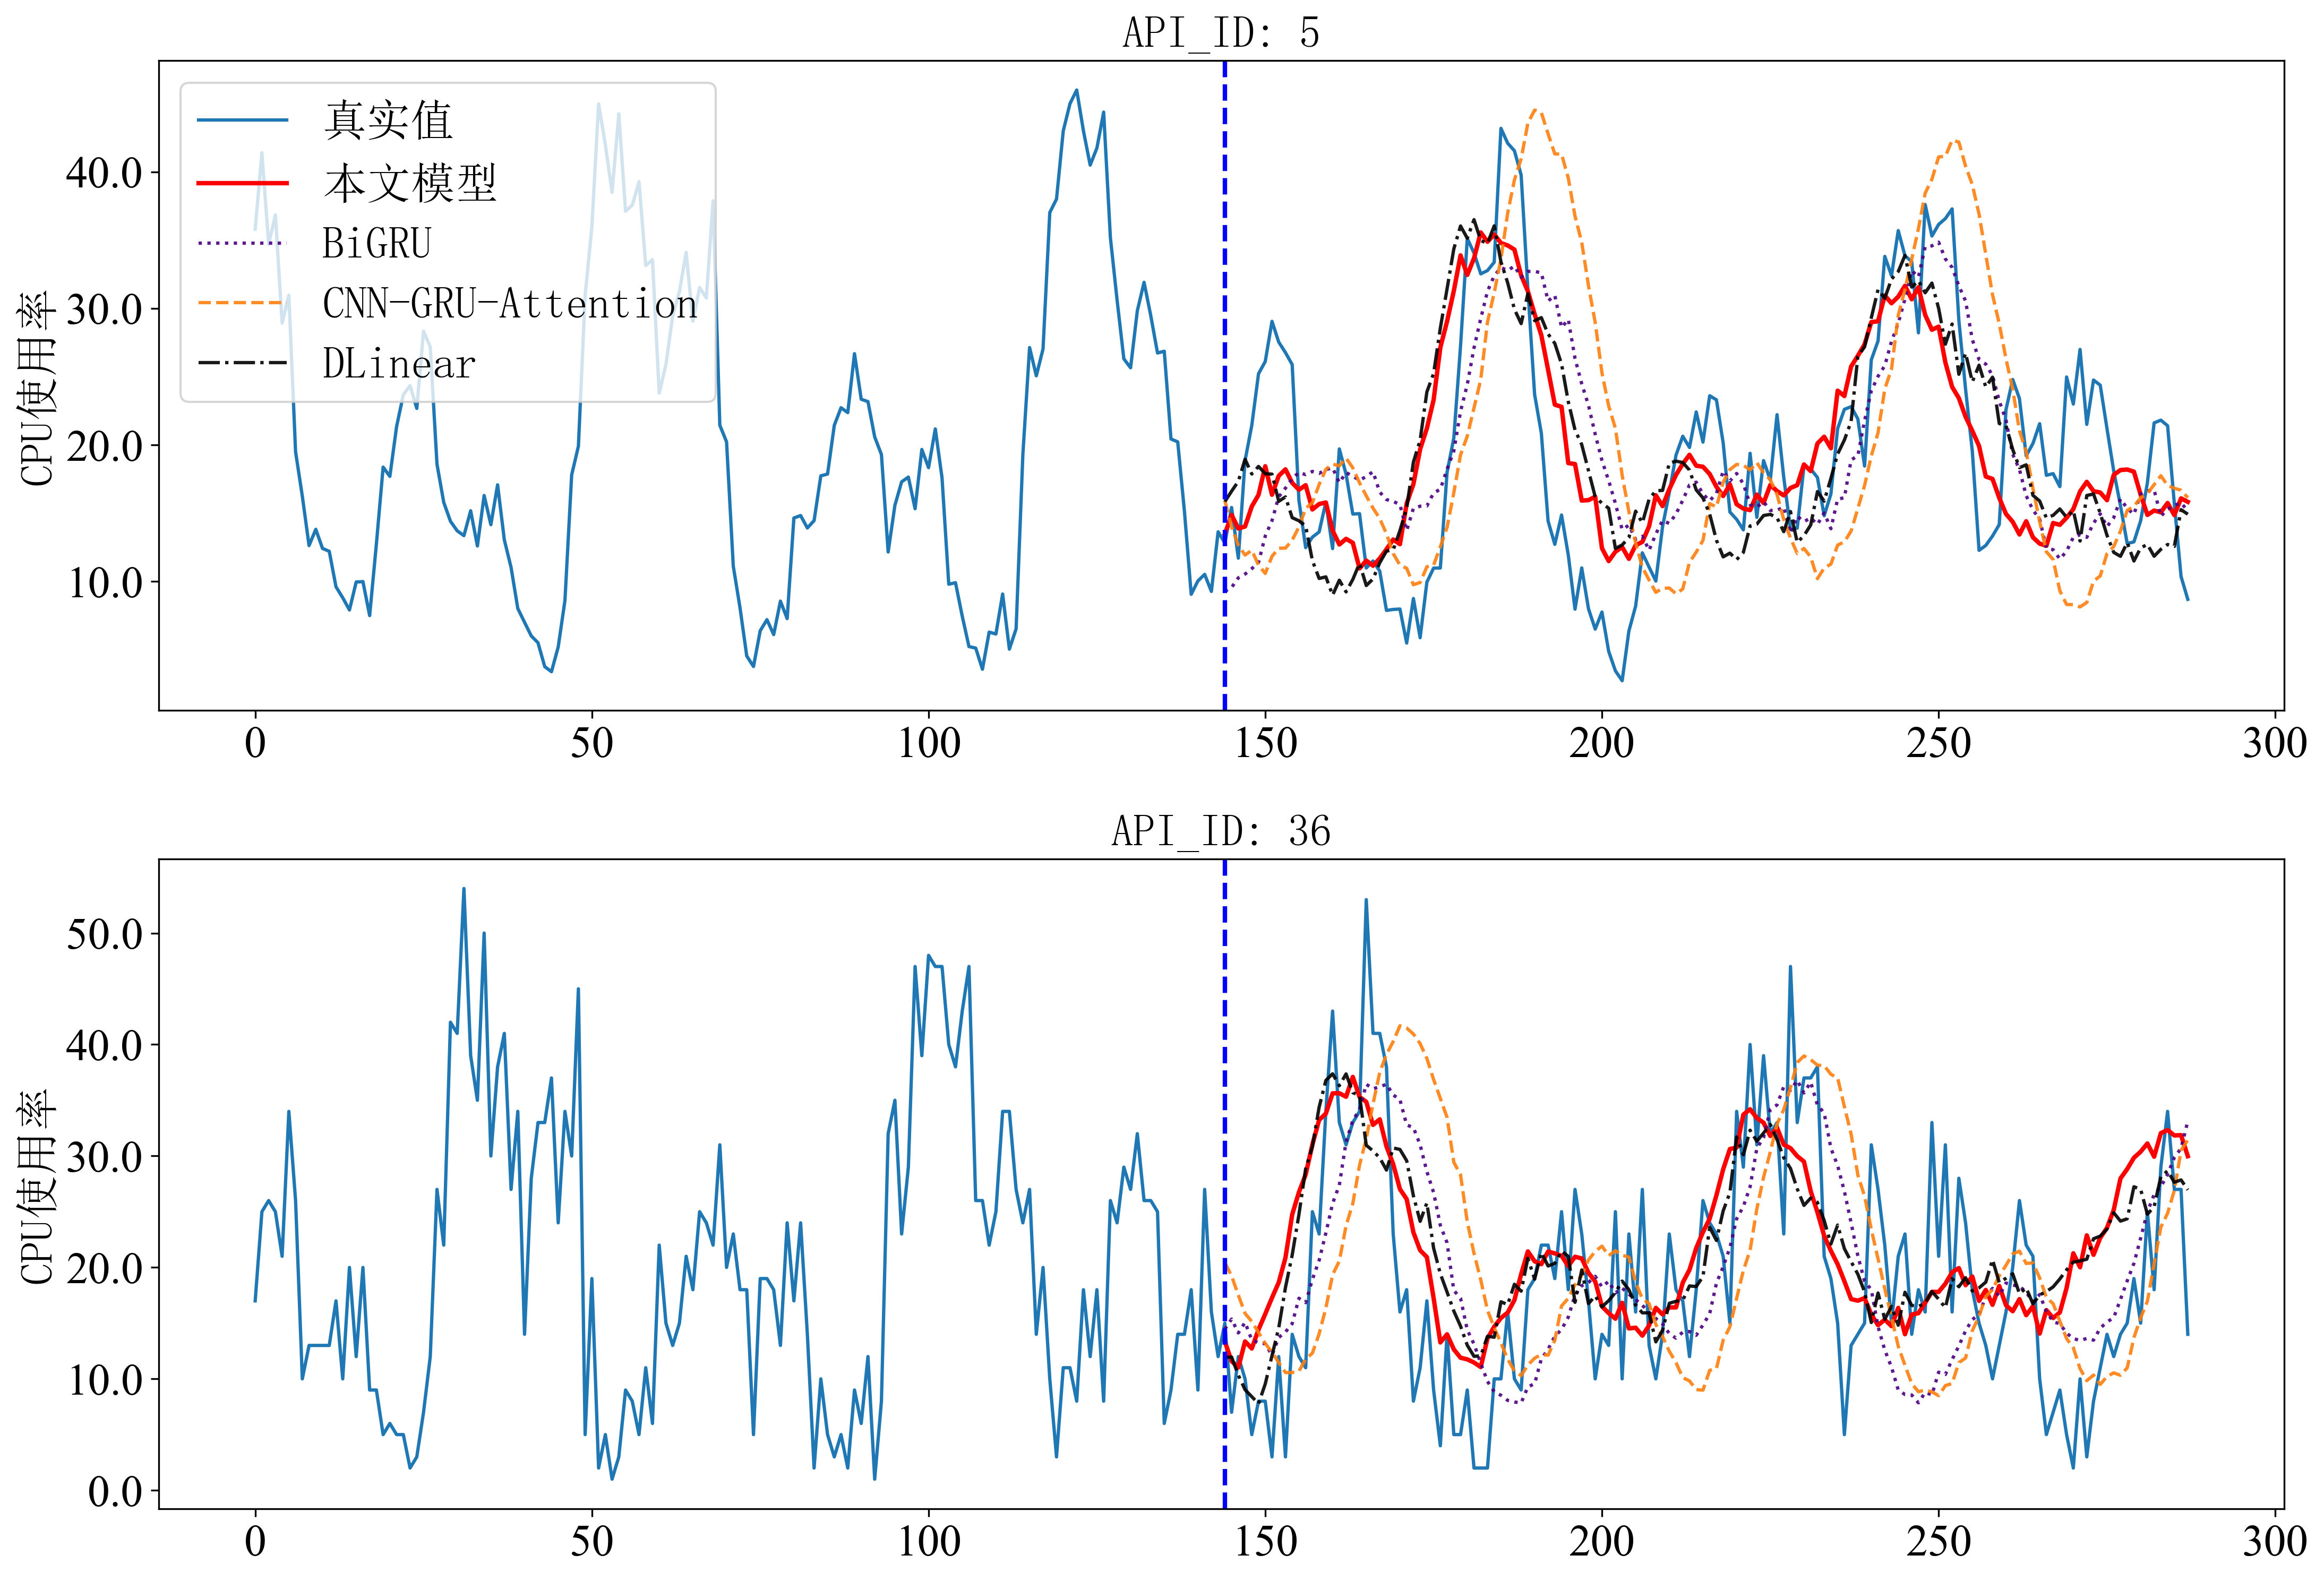

In [28]:
# target = [28, 72, 150]
target = [5, 36]
pred_len = 144

plt.figure(dpi=300, figsize=(15, 20))
idx = 1
for func_id in tqdm(target):
    print('id: {}'.format(func_id))
    dsformer_true = np.load(
        './predict_results/ds/dsformer/{}_true.npy'.format(func_id))

    dsformer_pred = np.load(
        './predict_results/ds/dsformer/{}_pred.npy'.format(func_id))
    dLinear_pred = np.load(
        './predict_results/ds/DLinear/{}_pred.npy'.format(func_id))
    cnn_gru_att_pred = np.load(
        './predict_results/ds/cnn_lstm_att/{}_pred.npy'.format(func_id))
    bi_gru_pred = np.load(
        './predict_results/ds/lstm/{}_pred.npy'.format(func_id))
    # pcnn_lstm_pred = np.load(
    #     './predict_results/ds/pcnn_lstm/{}_pred.npy'.format(func_id))

    # 绘图
    ax = plt.subplot(4, 1, idx)
    ax.plot(range(len(dsformer_true)), dsformer_true, linewidth=1.5,
            label='真实值')
    ax.plot(range(len(dsformer_true) - pred_len, len(dsformer_true)), dsformer_pred, linewidth=2, c='r',
            label='本文模型')
    ax.plot(range(len(dsformer_true) - pred_len, len(dsformer_true)), bi_gru_pred, alpha=0.9, ls=':', c='indigo',
            label='BiGRU')
    # ax.plot(range(len(dsformer_true) - pred_len, len(dsformer_true)), pcnn_lstm_pred, alpha=0.9,
    #         label='pCNN-LSTM')
    ax.plot(range(len(dsformer_true) - pred_len, len(dsformer_true)), cnn_gru_att_pred, alpha=0.9, ls='--',
            label='CNN-GRU-Attention')
    ax.plot(range(len(dsformer_true) - pred_len, len(dsformer_true)), dLinear_pred, alpha=0.9, c='k', ls='-.',
            label='DLinear')

    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    # 添加图例
    if idx == 1:
        ax.legend(prop=chinese_font, loc='upper left')

    # plt.xlabel('Time Point')
    ax.set_ylabel('CPU使用率', chinese_font)
    # 在特定索引位置画一条直线
    ax.axvline(len(dsformer_true) - pred_len, color='blue', linestyle='--', linewidth=2)
    ax.set_title('API_ID: {}'.format(func_id), chinese_font)

    idx += 1

plt.tight_layout()
plt.savefig('./predict_results/ds/' + '{}_forcast_paper.svg'.format('cpu'), format='svg', dpi=1000,
            bbox_inches='tight')
plt.show()